In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys # insert here the directory in which you have saved the file AppliedStatistics.py
sys.path.append(r"C:\Users\angelo\Documents\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"C:\Users\angelo\Documents\ownCloud\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"W:\TH-Valleriani\AngeloSynchFold\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"C:\MyDirectory\AppliedStatisticsRoutines")
import AppliedStatistics as appst
import importlib

*** Welcome to AppliedStatistics ***

Author: Angelo Valleriani
Affiliation: Max Planck Institute of Colloids and Interfaces
Contact: angelo.valleriani@mpikg.mpg.de
License: unlicensed (http://unlicense.org/)

Best use as: >>>import AppliedStatistics as appst

You are using AppliedStatistics version 2.1.2


#### References:

All exercise and data are taken from: 

Hogg, Tanis, Zimmerman, "Probability and Statistical Inference", Tenth Edition, Pearson

## Power analysis

#### Exercise 31

Consider a sample of $𝑁 = 12$ bottles of liquid with the label $355$ ml. Suppose that the population variance is known to be $\sigma^2=4$. We suspect that the true content of the bottles is less than $350$ ml. 

We set the critical region for the sample mean to be $\bar{x}≤354.04$. 
Here we have H0: $𝜇=355$ against H1: $𝜇<355$.

We want to find the power function $𝐾(𝜇)$ for all values of $𝜇≤355$.


In [2]:
#8.6-2
data = pd.read_csv("Exercise31.csv") 
data

ml
0   350
1   353
2   354
3   356
4   353
5   352
6   354
7   355
8   357
9   353
10  354
11  355

In [3]:
sigma2 = 4
x_bar_crit = 354.05

In [4]:
x = np.array(data["ml"])
N = len(x)

In [5]:
mu = np.linspace(350,355,1000, endpoint=True)
from scipy.stats import norm

For each population parameter $\mu$, we compute the probability of rejecting the null hypothesis
given the sample size N:

$$
K(\mu)\, =\, \int_{-\infty}^{\bar{x}_{crit}} \frac{\exp\left(-(x-\mu)^2/(2\sigma^2/N)\right)}{\sqrt{2\pi\sigma^2/N}}dx\, =\, \Phi\left(\frac{\bar{x}_{crit}-\mu}{\sqrt{\sigma^2/N}}\right)
$$

where $\Phi$ is the cdf of the standard normal.

In [6]:
K_mu = norm.cdf((x_bar_crit-mu)/np.sqrt(sigma2/N)) 

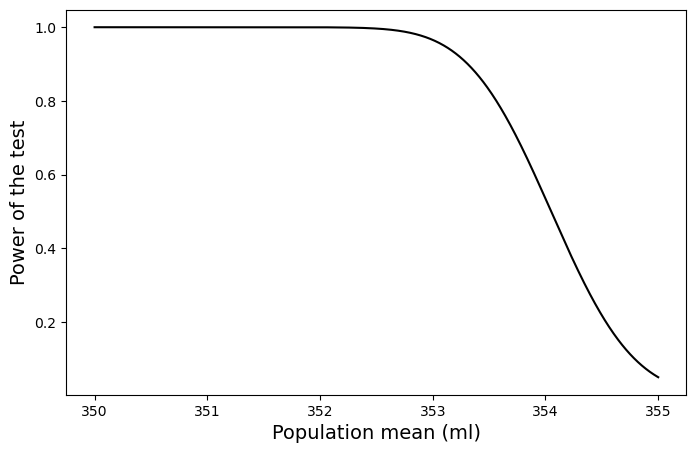

In [7]:
plt.figure(figsize=(8,5))
plt.plot(mu, K_mu,'-k')
plt.xlabel("Population mean (ml)", fontsize = 14)
plt.ylabel("Power of the test", fontsize = 14)
plt.show()

Here we want to know what the $\alpha$ value is (assuming the H0 is true)

In [8]:
print("The significance level of the test is:", round(K_mu[-1],2))

The significance level of the test is: 0.05


Now we work with the sample

In [9]:
x_bar = np.mean(x)
print("The sample mean is x_bar =", round(x_bar,2))

The sample mean is x_bar = 353.83


In [10]:
p_value = norm.cdf((x_bar-355)/(np.sqrt(sigma2/N)))
print("The approximate p-value is p =", round(p_value,2))

The approximate p-value is p = 0.02


In [11]:
power = norm.cdf((x_bar_crit-x_bar)/np.sqrt(sigma2/N))
print("The approximate power is K =", round(power,2))

The approximate power is K = 0.65


#### Exercise 32

Let $𝑝$ be the proportion of students at a given university who were not born at the university’s town.
We wish to test H0: $𝑝 =0.4$ against H1: $𝑝\neq 0.4$. We consider a sample of fixed size $𝑁 = 25$ and reject H0 when the number $𝑋$ of external students is smaller than $6$ or larger than $14$. 

How do we compute the power function for all possible proportions?

In [12]:
# 8.6-03
p0 = 0.4
N = 25
c_L = 6
c_U = 14
p_L = c_L/N
p_U= c_U/N

We start by computing the probability of rejecting the null hypothesis when it is true:

$$
\alpha \, =\, 1 - \int_{z_L}^{z_U}\phi(x)dx
$$

where $z_L$ and $z_U$ are the z-scores corresponding to the boundary values $p_L=6/25$ and $p_U=14/25$, respectively, when the null hypothesis is true.

In [13]:
#a 
N = 25
sigma2 = p0*(1-p0)/N
z_L = (p_L-p0)/np.sqrt(sigma2)
z_U = (p_U-p0)/np.sqrt(sigma2)
alpha = 1- (norm.cdf(z_U) - norm.cdf(z_L))
print("The significance level is alpha =",alpha.round(2))

The significance level is alpha = 0.1


The power $K$ is the probability of rejecting the null hypothesis when the alternative is true

$$
K(q) \, =\, 1 - \int_{k_L}^{k_U}\phi(x)dx
$$
with
$$
k_L \, =\, \frac{p_L-q}{\sqrt{\sigma^2}}\, , \,\,\,\,\,\, k_U \, =\, \frac{p_U-q}{\sqrt{\sigma^2}}\, ,
$$
and
$$
\sigma^2 = \frac{q(1-q)}{N}
$$

In [14]:
#b
p_K = np.linspace(0.001,0.999,1000,endpoint=True)
K_p = []
for q in p_K:
    sigma2 = q*(1-q)/N
    k_L = (p_L-q)/np.sqrt(sigma2)
    k_U = (p_U-q)/np.sqrt(sigma2)
    K = 1- (norm.cdf(k_U) - norm.cdf(k_L))
    K_p.append(K) 

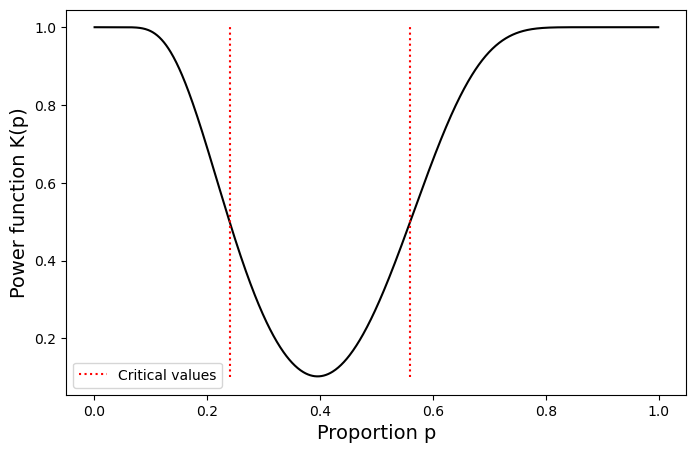

In [15]:
plt.figure(figsize=(8,5))
plt.plot(p_K,np.array(K_p),'-k')
plt.plot([6/25,6/25], [0.1,1.0], ':r', label = "Critical values")
plt.plot([14/25,14/25], [0.1,1.0], ':r')
plt.xlabel("Proportion p", fontsize = 14)
plt.ylabel("Power function K(p)", fontsize = 14)
plt.legend(loc = 'best')
plt.show()

#### Exercise 33

The yield in tons per acre of a certain weed is normally distributed with mean $\mu_0=1.5$ and variance $\sigma^2 = 0.09$.
A new fertilizer should increase the mean to $1.7$ tons per acre. Assuming the same variance, we have to determine the critical value $𝑐$ such that we can reject H0: $\mu=\mu_0=1.5$ when $\bar{x}≥𝑐$  in favor of H1: $\mu >1.5$.

We determine $𝑐$ and the sample size $𝑁$ such that $\alpha=0.05$, and the power at $\mu_1=1.7$ is $𝐾(1.7)=0.95$.

We start by writing the probability to reject the null hypothesys as a function of $c$, the critical value for $\bar{x}$:

$$ \alpha = \int_{\frac{c-\mu_0}{\sqrt{\sigma^2/N}}}^\infty \phi(x) dx$$

For any $c$, the probability to reject the null hypothesys if the population parameter is $\mu_1$, is given by:

$$ k(\mu_1) = \int_{\frac{c-\mu_1}{\sigma/\sqrt{N}}}^\infty \phi(x) dx$$

For $z_{0.05} = 1.65$ we have the two equations:

$$ \frac{c-\mu_0}{\sigma/\sqrt{N}} = 1.65\,\, ,\,\, \frac{c-\mu_1}{\sigma/\sqrt{N}} = -1.65 $$

which can be solved as:

$$ c = \frac{\mu_0+\mu_1}{2} $$

$$ N = \left(\frac{2\cdot 1.65\cdot \sigma}{\mu_1 - \mu_0}\right)^2 $$

In [16]:
from scipy.stats import norm

In [17]:
alpha = 0.05
mu_0 = 1.5
mu_1 = 1.7
sigma2 = 0.09
z_a = -norm.ppf(alpha)
c = (mu_0+mu_1)/2
N = (2*z_a*np.sqrt(sigma2)/(mu_1-mu_0))**2
print("The critical value to reject the H0 is c =",c)
print("The sample size to achieve the required power is N =", int(N)+1)

The critical value to reject the H0 is c = 1.6
The sample size to achieve the required power is N = 25


## Conclusions

In this unit, you have seen a few examples that show how to use power calculation to determine the critical value and/or the sample size of an experiment. 

When the sample size is fixed, one can analyze the power of a test as function of the effect size (i.e. the different in the parameter between H0 and H1). 

When the sample size is not fixed, one can determine both the critical region and the sample size in order to achieve a required significance and a required power.

This method is extremely important when planning an experiment or an observation. 